# Machine Learning Models: Intuition, Equations, and Behavior

### What Are Model Assumptions?
Assumptions are the conditions under which a model behaves as expected. 
Violating them reduces accuracy.

Example:
- Linear Regression assumes a linear relationship between features and target.
- If the relationship is non-linear, error increases.


### Linear Regression
## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Loss function (MSE):
MSE = (1/n) Σ (yᵢ - ŷᵢ)²

MSE is a quadratic function in (w, b), which creates a convex bowl.
Gradient Descent moves downhill on this surface until it reaches the minimum.


### Linear Regression Assumptions

1. **Linearity** – Relationship between feature X and target Y is roughly straight.
   - Example: More study hours → higher score.
2. **Independence** – Each observation’s error is independent of others.
   - Example: One student’s test score doesn’t affect another’s.
3. **Homoscedasticity** – Error variance is roughly equal across X values.
   - Example: Predicting house prices: error shouldn’t increase for expensive houses.
4. **No multicollinearity** – Features shouldn’t be highly correlated.
   - Example: Don’t include both “total study hours” and “hours in library” if almost the same.
5. **Normality of errors** – For statistical inference (confidence intervals, t-tests).


In [3]:
from IPython.display import IFrame

# Embed Marimo.app in notebook (if browser allows)
IFrame("https://marimo.app/l/9hsfob?show-code=false&embed=true", width=900, height=600)


### Polynomial Regression

The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

- **Note:** Interaction terms can be added to capture combined effects of features.
$$
y = a_0 + a_1 x_1 + a_2 x_2 + x_1 * x_2 
$$ 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate data
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

# Simple linear regression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

# Polynomial regression
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
yfit_poly = poly_model.predict(xfit[:, np.newaxis])

# Plot
plt.scatter(x, y)
plt.plot(xfit, yfit, label="Linear fit")
plt.plot(xfit, yfit_poly, label="Polynomial fit (deg 7)")
plt.legend()
plt.show()


NameError: name 'x' is not defined

# Regularization

(0.0, 10.0)

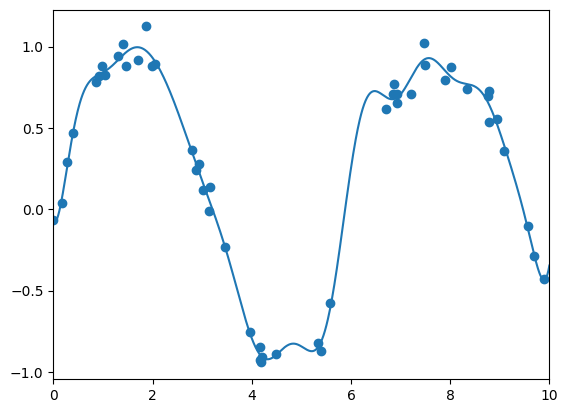

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)

(-1.5, 1.5)

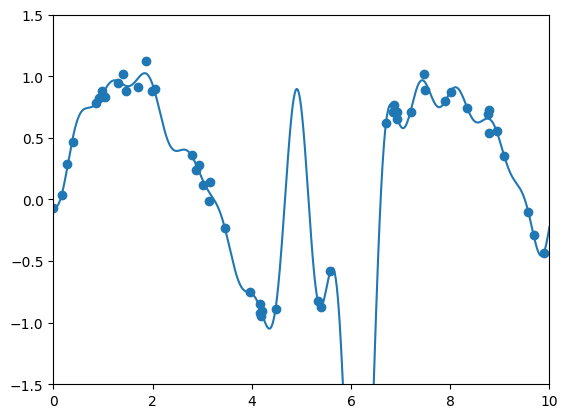

In [25]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

### Ridge regression ($L_2$ Regularization)

Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be 
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
where $\alpha$ is a free parameter that controls the strength of the penalty.
This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator:

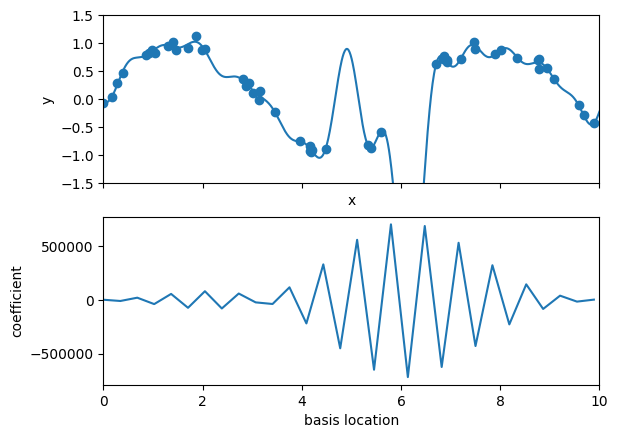

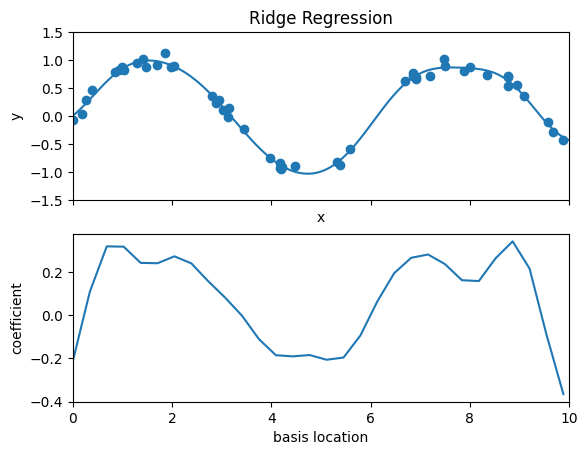

In [27]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

The $\alpha$ parameter is essentially a knob controlling the complexity of the resulting model.
In the limit $\alpha \to 0$, we recover the standard linear regression result; in the limit $\alpha \to \infty$, all model responses will be suppressed.
One advantage of ridge regression in particular is that it can be computed very efficiently—at hardly more computational cost than the original linear regression model.

### Lasso regression ($L_1$ regularization)

Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor *sparse models* where possible: that is, it preferentially sets model coefficients to exactly zero.

We can see this behavior in duplicating the ridge regression figure, but using L1-normalized coefficients:

/home/bluro/miniconda3/envs/tf-gpu/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


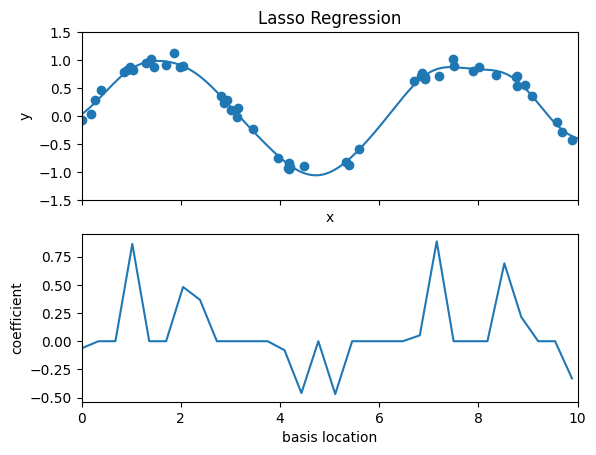

In [28]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

With the lasso regression penalty, the majority of the coefficients are exactly zero, with the functional behavior being modeled by a small subset of the available basis functions.

# Logistic Regression

The idea is to take our linear model:  
$$
z = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$  
and instead of predicting a numeric value directly, we **pass it through a sigmoid function** to get a probability:  
$$
\hat{y} = \frac{1}{1 + e^{-z}}
$$  
### Logistic Regression Assumptions

1. **Binary outcome:** The target variable should be 0/1 (or two classes).  
2. **Linearity of log-odds:** Logit (log-odds) is a linear combination of features:  
   $$
   \log\frac{p}{1-p} = a_0 + a_1 x_1 + a_2 x_2 + \dots
   $$  
3. **Independence of observations:** Each observation should be independent.  
4. **No multicollinearity:** Features shouldn’t be highly correlated with each other.  
5. **Sufficient sample size:** Enough events per predictor to estimate coefficients reliably.


- **Decision threshold:** If $\hat{y} > 0.5$, predict class 1; otherwise, predict class 0.  
- **Loss function:** Binary Cross-Entropy measures how far predictions are from true labels:  
$$
L = - \frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$



In [31]:
from IPython.display import IFrame

# Embed Marimo.app in notebook (if browser allows)
IFrame("https://marimo.app/?show-code=false&embed=true&slug=cs19cb", width=1000, height=800)

# Decision Tree

Decision Trees can be used for **classification** or **regression**.  
They split data into subsets based on feature values until a stopping criterion is met (pure leaf nodes, max depth, or minimum samples).

### Intuition

- Think of it as a series of **yes/no questions**:  
  - Example: "Is Age > 30?" → yes/no branch  
  - Next question: "Income > 50k?" → yes/no branch  
- Leaf nodes contain predicted class (for classification) or average value (for regression).

### Decision Tree Assumptions

1. The **main assumption** is that the data can be split into subsets based on the input variables from the data features. 
2. The split can stand alone and is able to maximize information gain.  
3. These splits are binary and this means each split is formed into two subsets from a single input feature.

### Splitting Criteria / Loss Functions

**1️⃣ Gini Impurity (for classification)**  
Measures node impurity; lower is better:  
$$
Gini(D) = 1 - \sum_{i=1}^{C} p_i^2
$$  
- \(p_i\) = proportion of class \(i\) in node \(D\)  
- \(C\) = number of classes  

**2️⃣ Entropy / Information Gain (for classification)**  
$$
Entropy(D) = - \sum_{i=1}^{C} p_i \log_2(p_i)
$$  
Information Gain for a split:  
$$
IG = Entropy(parent) - \sum_j \frac{|child_j|}{|parent|} Entropy(child_j)
$$

**3️⃣ Mean Squared Error (for regression)**  
$$
MSE(D) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2
$$  
- Choose the split that **minimizes the weighted MSE of child nodes**.


<img src="dt.png" alt="Decision Tree" width="1200"/>

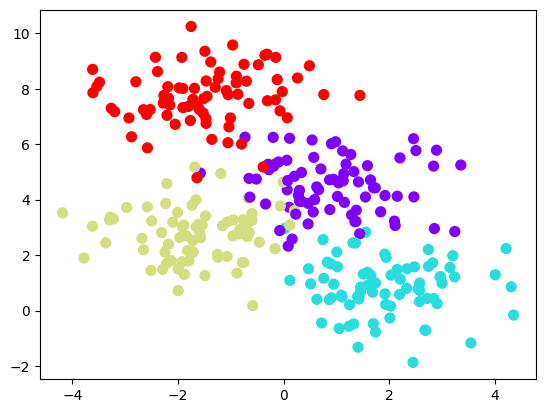

In [4]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

<img src="dt2.png" alt="DT" width="1200"/>

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [8]:
import numpy as np
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

/tmp/ipykernel_33688/1425031647.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


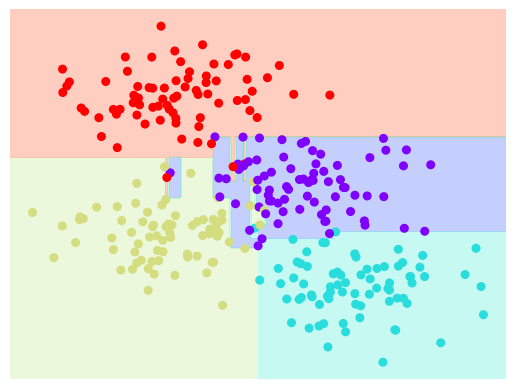

In [9]:
visualize_classifier(DecisionTreeClassifier(), X, y)

### Such over-fitting turns out to be a general property of decision trees: it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from.

## Ensembles of Estimators: **Random Forests**
### This notion—that multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called bagging. Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which over-fits the data, and averages the results to find a better classification. An ensemble of randomized decision trees is known as a random forest.

/tmp/ipykernel_33688/1425031647.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


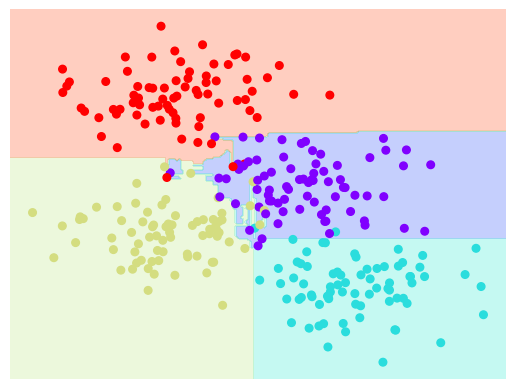

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

### Random Forest Regression

<ErrorbarContainer object of 3 artists>

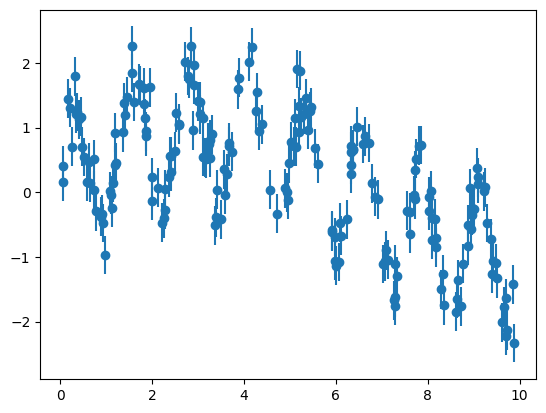

In [11]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o')

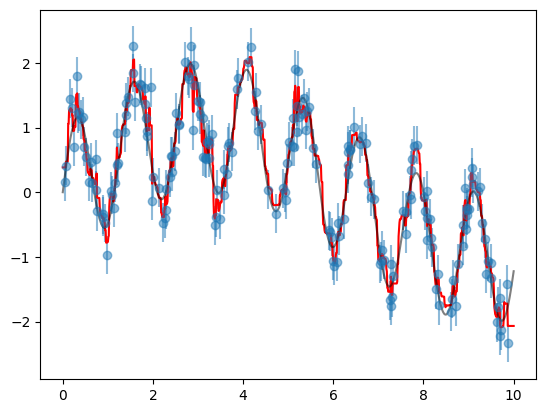

In [12]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5)

### Here the true model is shown in the smooth gray curve, while the random forest model is shown by the jagged red curve. As you can see, the non-parametric random forest model is flexible enough to fit the multi-period data, without us needing to specifying a multi-period model!

## Random Forest for Classifying Digits

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()

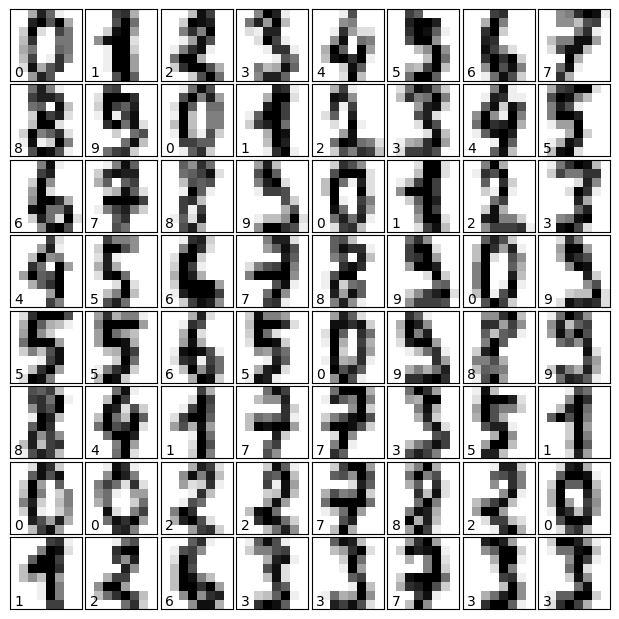

In [14]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [18]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



# Support Vector Machine (SVM)

SVM is used for **classification** (and regression with SVR).  
It finds a **hyperplane** that best separates classes with **maximum margin**.

### Intuition

- Think of it as drawing a line (or plane in higher dimensions) that separates two classes:  
  - The line is chosen so that the **distance to the nearest points from each class (support vectors) is maximized**.  
- Support vectors are the critical points that define the boundary.

### SVM Assumptions

1. **Classes are separable** (or approximately separable using soft margin).  
2. **Independent observations**.  
3. **Features are scaled** (SVM is sensitive to feature magnitudes).  
4. **Optional kernel assumption:** If data is not linearly separable, a kernel function maps data to higher dimensions.

### Model

- Linear SVM hyperplane equation:  
$$
w \cdot x + b = 0
$$  
- Decision function:  
$$
\hat{y} = sign(w \cdot x + b)
$$  

### Loss Function (Hinge Loss)

Hinge loss for a single example:  
$$
L = max(0, 1 - y_i (w \cdot x_i + b))
$$  

- Total loss (with regularization):  
$$
\text{Loss} = \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} max(0, 1 - y_i (w \cdot x_i + b))
$$  
- \(C\) controls the trade-off between margin size and classification error.

### Kernel Trick

- For non-linear data, SVM uses a **kernel function** \(K(x_i, x_j)\) to map input into higher-dimensional space.  
- Common kernels: Linear, Polynomial, RBF (Gaussian).

### Visualization

- Show 2D plot with:
  - Margin lines  
  - Support vectors  
  - Decision boundary


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

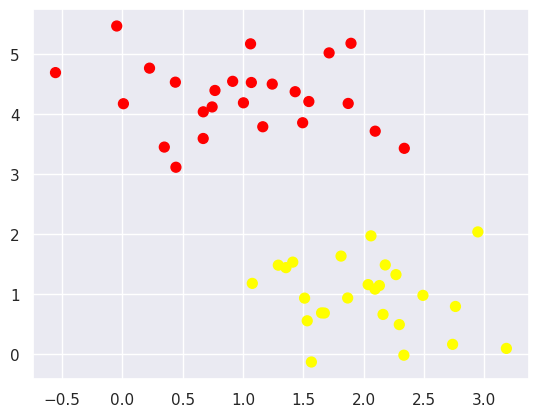

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

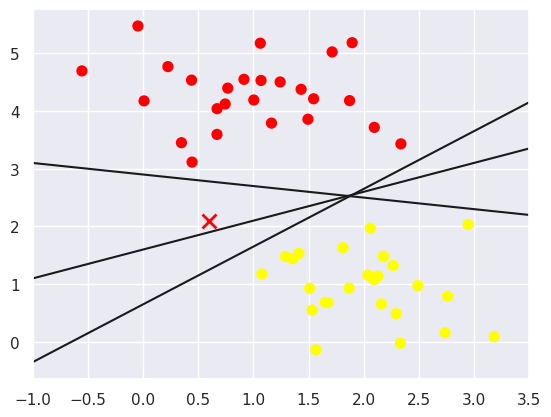

In [22]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

### These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.

## Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look:

(-1.0, 3.5)

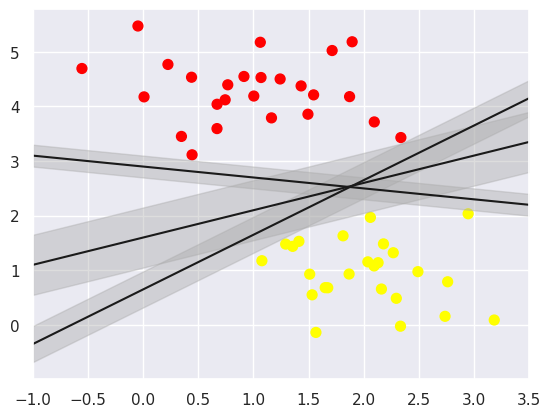

In [23]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [24]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

,C,10000000000.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [25]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

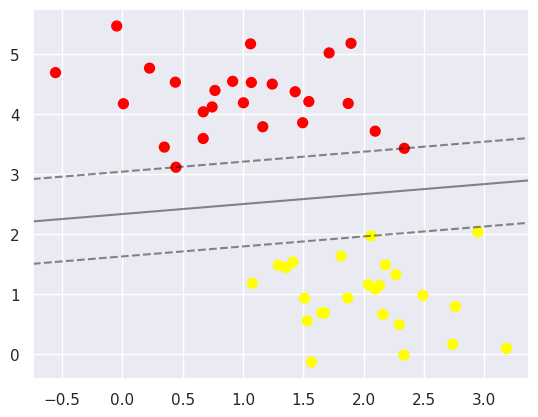

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

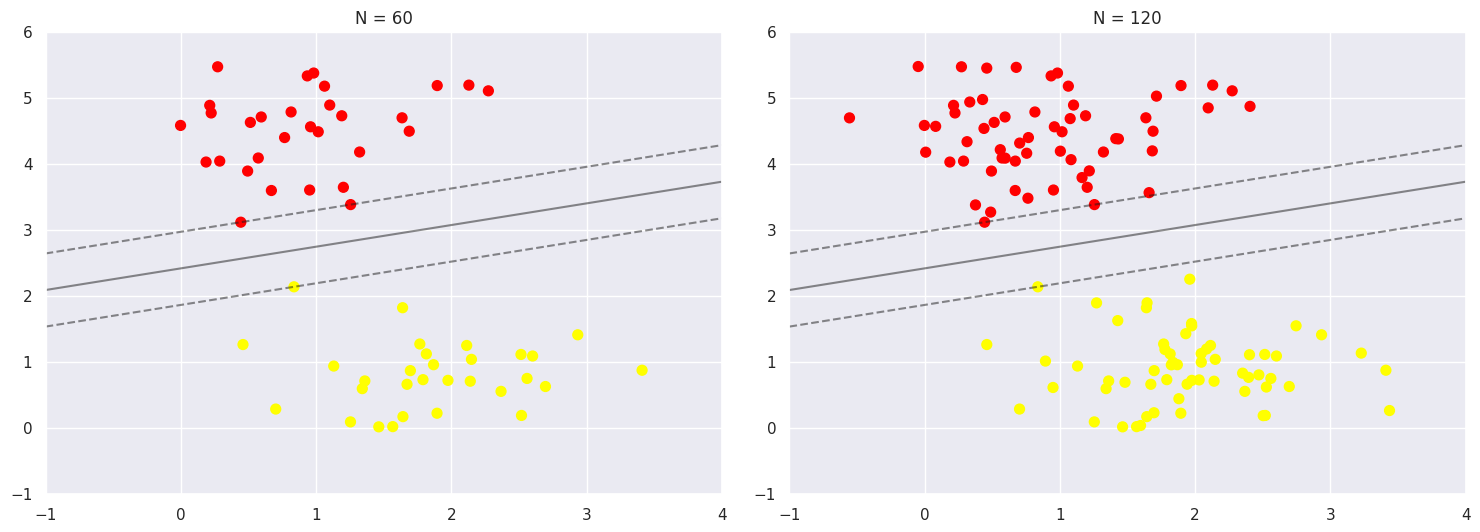

In [27]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

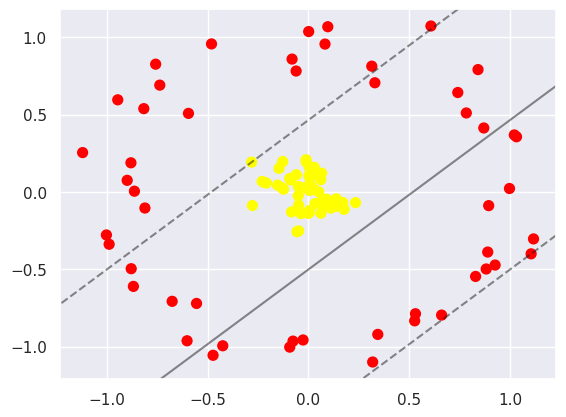

In [35]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [36]:
r = np.exp(-(X ** 2).sum(1))

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # optional in modern matplotlib
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import numpy as np



def plot_3D(elev=30, azim=30, X=X, y=y, r=r):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('r')
    plt.show()

interact(plot_3D, elev=(-90, 90), azim=(-180, 180),
         X=fixed(X), y=fixed(y), r=fixed(r))


interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 1.33535763e-01, -6.82786265e-02],
       [-9.27369623e-02,  8.74367350e-02],
       [-1.23318829e-01,  1.78678141e-02],
       [ 7.40505585e-01,  6.42814344e-01],
       [ 1.76749625e-01, -1.12198686e-01],
       [-1.93908323e-02,  2.72625057e-02],
       [ 8.69474222e-01,  4.13479429e-01],
       [ 8.81391309e-01, -4.98189574e-01],
       [-8.62976909e-01,  4.73639359e-03],
       [ 6.09185832e-02,  7.92256045e-02],
       [ 3.29372956e-01,  7.05749170e-01],
       [ 8.98747721e-02, -4.72931373e-02],
       [-9.88358004e-01, -3.38247349e-01],
       [-5.06708726e-02, -2.49364138e-02],
       [ 1.70424204e-03,  1.04792514e-01],
       [ 7.82753634e-01,  5.10492439e-01],
       [-2.67477928e-02, -9.57211916e-01],
       [-2.81702236e-01,  1.92658938e-01],
       [ 8.20766059e-02,  9.55940246e-01],
       [-5.54943281e-01, -7.20955784e-01],
       [ 2.33606912e-01, -6.92887728e-02],
       [-8.68035686e-01, -6.10859520e-01],
       

### We can see that with this additional dimension, the data becomes trivially linearly separable, by drawing a separating plane at, say, r=0.7.

Here we had to choose and carefully tune our projection: if we had not centered our radial basis function in the right location, we would not have seen such clean, linearly separable results. In general, the need to make such a choice is a problem: we would like to somehow automatically find the best basis functions to use.

In [38]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

,C,1000000.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


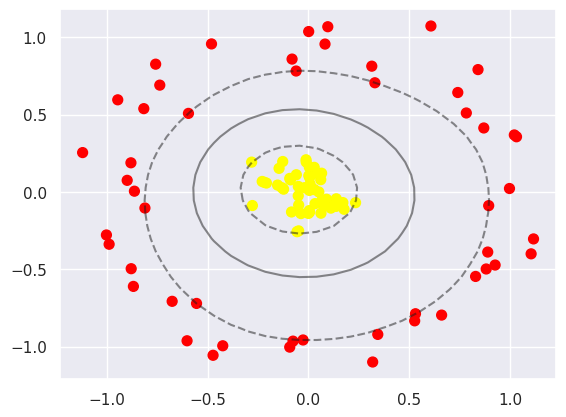

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

### Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary. This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.

## Tuning the SVM: Softening Margins
### Our discussion thus far has centered around very clean datasets, in which a perfect decision boundary exists. But what if your data has some amount of overlap? For example, you may have data like this:

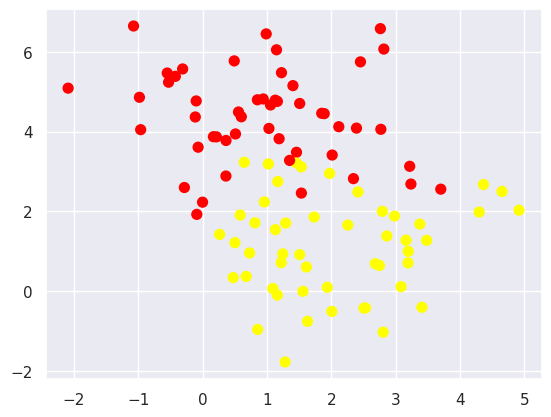

In [41]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

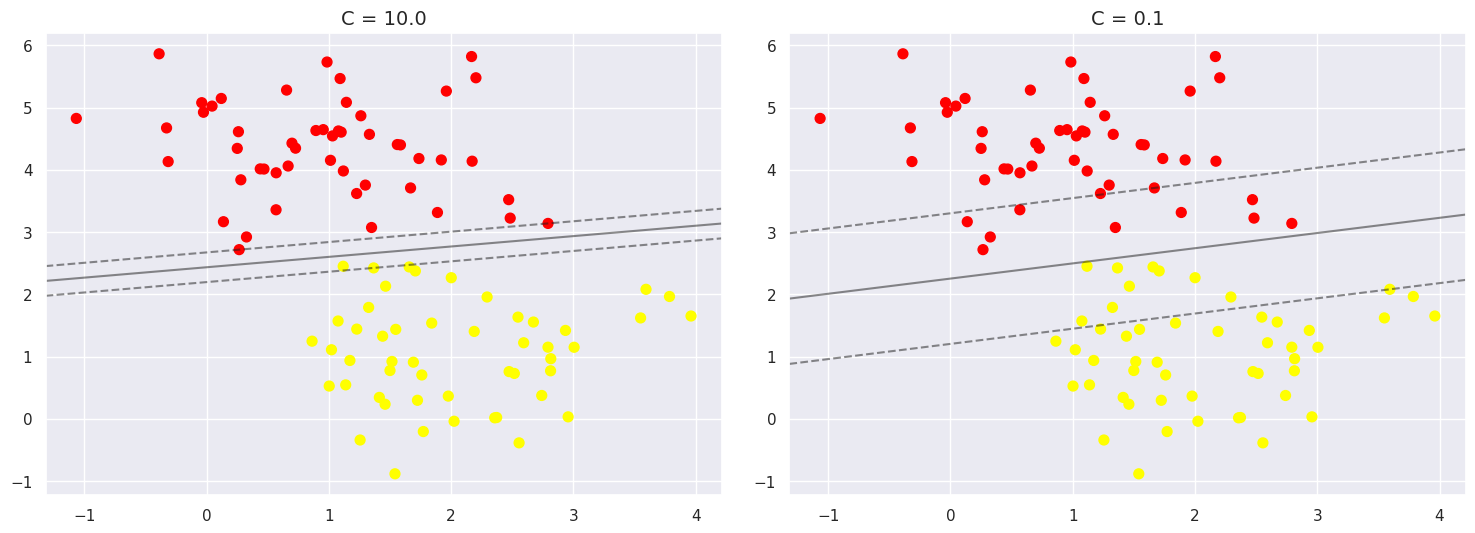

In [42]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

 ### To handle this case, the SVM implementation has a bit of a fudge-factor which "softens" the margin: that is, it allows some of the points to creep into the margin if that allows a better fit. The hardness of the margin is controlled by a tuning parameter, most often known as C.

# Perceptron

- **Idea:** The simplest neural network — just one neuron.
- Takes inputs, multiplies by weights, adds bias, and outputs 0 or 1 based on a threshold.

**Equation:**
$$
z = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b
$$
$$
\hat{y} =
\begin{cases}
1, & \text{if } z \geq 0 \\
0, & \text{if } z < 0
\end{cases}
$$

**Assumptions / Notes:**
1. Input features are numerical or encoded.
2. Linearly separable data (for simple perceptron to converge).
3. Binary classification (0/1 output).

**Loss / Update Rule:**
- Perceptron updates weights if it misclassifies a sample:
$$
w_i := w_i + \eta (y - \hat{y}) x_i
$$
$$
b := b + \eta (y - \hat{y})
$$
where $\eta$ is the learning rate.


In [69]:
from IPython.display import HTML
HTML('<img src="dl.gif">')


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Simple dataset (linearly separable)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])  # AND logic

# Perceptron function
def perceptron_plot(w1=0.5, w2=0.5, b=-0.5):
    plt.figure(figsize=(6,6))
    for i, point in enumerate(X):
        if y[i]==1:
            plt.scatter(point[0], point[1], c='r', s=100)
        else:
            plt.scatter(point[0], point[1], c='b', s=100)
    # Decision boundary: w1*x1 + w2*x2 + b = 0 → x2 = -(w1*x1 + b)/w2
    x_vals = np.linspace(-0.5,1.5,100)
    y_vals = -(w1*x_vals + b)/w2
    plt.plot(x_vals, y_vals, 'g--', linewidth=2)
    plt.xlim(-0.5,1.5)
    plt.ylim(-0.5,1.5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Perceptron Decision Boundary\nw1={w1}, w2={w2}, b={b}')
    plt.show()

interact(perceptron_plot, w1=(-1,1,0.1), w2=(-1,1,0.1), b=(-1,1,0.1))


interactive(children=(FloatSlider(value=0.5, description='w1', max=1.0, min=-1.0), FloatSlider(value=0.5, desc…

<function __main__.perceptron_plot(w1=0.5, w2=0.5, b=-0.5)>

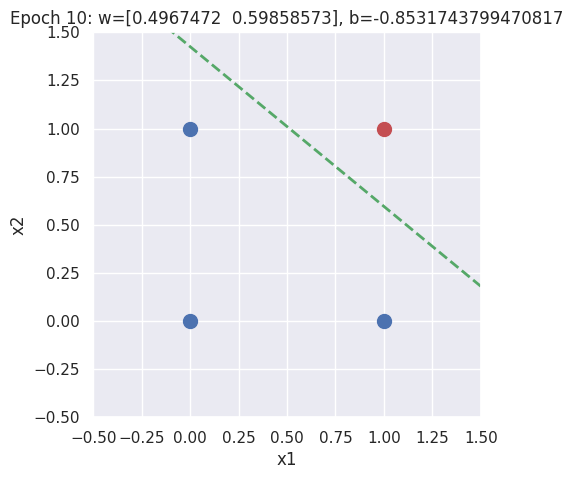

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from IPython.display import clear_output

# Dataset: AND logic (linearly separable)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

# Initialize weights and bias
w = np.random.randn(2)
b = np.random.randn()
eta = 0.1  # learning rate
epochs = 10

def plot_boundary(w, b, epoch):
    plt.figure(figsize=(5,5))
    for i, point in enumerate(X):
        color = 'r' if y[i]==1 else 'b'
        plt.scatter(point[0], point[1], c=color, s=100)
    x_vals = np.linspace(-0.5, 1.5, 100)
    y_vals = -(w[0]*x_vals + b)/w[1]
    plt.plot(x_vals, y_vals, 'g--', linewidth=2)
    plt.xlim(-0.5,1.5)
    plt.ylim(-0.5,1.5)
    plt.title(f'Epoch {epoch+1}: w={w}, b={b}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

# Perceptron learning loop
for epoch in range(epochs):
    for i in range(len(X)):
        z = np.dot(w, X[i]) + b
        y_hat = 1 if z >= 0 else 0
        # Update if misclassified
        w += eta * (y[i] - y_hat) * X[i]
        b += eta * (y[i] - y_hat)
    clear_output(wait=True)
    plot_boundary(w, b, epoch)
    sleep(0.5)


# Artificial Neural Network (Feedforward)

**Structure:**
- Input layer → Hidden layer(s) → Output layer
- Neurons: compute weighted sum + bias → activation

**Neuron equation:**
$$
z^{[l]} = \sum_i w_i^{[l]} a_i^{[l-1]} + b^{[l]}
$$
$$
a^{[l]} = \sigma(z^{[l]})
$$

**Activation functions:**
- Sigmoid: $\sigma(z) = 1 / (1 + e^{-z})$ → 0-1 probability
- ReLU: $f(z) = \max(0, z)$ → non-linear, avoids vanishing gradient
- Softmax (output layer): converts logits to probabilities for multi-class

**Loss functions:**
- Regression: MSE → $L = \frac{1}{n}\sum_i(y_i - \hat{y}_i)^2$
- Classification: Cross-Entropy → $L = -\frac{1}{n}\sum_i y_i \log(\hat{y}_i)$

**Assumptions / Notes:**
1. Input features are scaled/normalized.
2. Enough data to train parameters.
3. Independent observations (for simple FFNN).


<img src="ann.png" alt="DT" width="1000"/>

# Artificial Neural Network (Non-linear Classification)

**Task:** Classify points from a 2D dataset shaped like two moons.  

**Network Structure:**
- **Input layer:** 2 neurons (x1, x2)
- **Hidden layer:** 3 neurons, sigmoid activation
- **Output layer:** 1 neuron, sigmoid activation → outputs probability of class 1

**Forward Pass Equations:**

Hidden layer neurons:
$$
z^{[1]}_j = \sum_i w^{[1]}_{ji} x_i + b^{[1]}_j
$$
$$
a^{[1]}_j = \sigma(z^{[1]}_j)
$$

Output neuron:
$$
z^{[2]} = \sum_j w^{[2]}_j a^{[1]}_j + b^{[2]}
$$
$$
\hat{y} = \sigma(z^{[2]})
$$

**Loss Function:** Binary Cross-Entropy
$$
L = - \frac{1}{n} \sum_i [ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) ]
$$

**Intuition:**
- Hidden neurons learn **non-linear features**  
- Output neuron combines these features to classify points  
- Interactive sliders allow changing weights/biases to **see the effect on classification**  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from sklearn.datasets import make_moons

# Generate data
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Forward pass
def forward_pass(w11, w12, w21, w22, b1, b2, w1o, w2o, bo):
    h1 = sigmoid(w11*X[:,0] + w21*X[:,1] + b1)
    h2 = sigmoid(w12*X[:,0] + w22*X[:,1] + b2)
    y_hat = sigmoid(w1o*h1 + w2o*h2 + bo)
    return y_hat

# Plotting function
def plot_ann(w11, w12, w21, w22, b1, b2, w1o, w2o, bo):
    y_hat = forward_pass(w11, w12, w21, w22, b1, b2, w1o, w2o, bo)
    plt.figure(figsize=(6,6))
    plt.scatter(X[:,0], X[:,1], c=y_hat, cmap='coolwarm', s=50, edgecolor='k')
    plt.title('ANN Output Probability (Class 0 vs 1)')
    plt.xlabel('x1'); plt.ylabel('x2')
    plt.colorbar(label='Predicted probability')
    plt.show()

# Interactive sliders
interact(plot_ann,
         w11=FloatSlider(min=-5, max=5, step=0.1, value=2),
         w12=FloatSlider(min=-5, max=5, step=0.1, value=-2),
         w21=FloatSlider(min=-5, max=5, step=0.1, value=2),
         w22=FloatSlider(min=-5, max=5, step=0.1, value=2),
         b1=FloatSlider(min=-5, max=5, step=0.1, value=0),
         b2=FloatSlider(min=-5, max=5, step=0.1, value=0),
         w1o=FloatSlider(min=-5, max=5, step=0.1, value=2),
         w2o=FloatSlider(min=-5, max=5, step=0.1, value=-2),
         bo=FloatSlider(min=-5, max=5, step=0.1, value=0))


interactive(children=(FloatSlider(value=2.0, description='w11', max=5.0, min=-5.0), FloatSlider(value=-2.0, de…

<function __main__.plot_ann(w11, w12, w21, w22, b1, b2, w1o, w2o, bo)>

# Convolutional Neural Network (CNN)

**Use case:** Image classification (e.g., handwritten digits, cats vs dogs)  

### Structure:
- **Input layer:** image pixels  
- **Convolutional layer:** extracts local features using filters/kernels  
- **Activation:** ReLU  
- **Pooling layer:** reduces spatial dimensions (MaxPooling)  
- **Fully connected layer(s):** combines features  
- **Output layer:** softmax for multi-class probability  



### Layer Equations

**1. Convolution:**
$$
S[i,j] = (X * K)[i,j] = \sum_m \sum_n X[i+m,j+n] \cdot K[m,n]
$$

- $X$ = input image  
- $K$ = kernel/filter  
- $S[i,j]$ = output feature map value at position $(i,j)$  
- $m,n$ = indices over the kernel dimensions  
- $i,j$ = indices over the output feature map  
- **Intuition:** Slide the kernel over the input image; at each position, multiply overlapping pixels by kernel weights and sum → highlights a local pattern  

**2. Activation (ReLU):**
$$
a[i,j] = \text{ReLU}(S[i,j]) = \max(0, S[i,j])
$$`
- Introduces non-linearity  
- Prevents negative activations  

**3. Pooling (MaxPooling 2x2):**
$$
P[i,j] = \max\{ a[2i:2i+1, 2j:2j+1] \}
$$
- Reduces spatial dimensions of feature maps  
- Keeps the strongest response from each patch  

**4. Fully Connected + Output:**
$$
z = W \cdot h + b, \quad \hat{y} = \text{softmax}(z)
$$
- $h$ = flattened feature maps from previous layers  
- $W$ = weights for fully connected layer  
- $b$ = bias  
- $\hat{y}$ = predicted probabilities for each class  



### Loss Functions

**Binary Classification (2 classes)**  
- Predicted probability: $\hat{y} \in [0,1]$, True label: $y \in \{0,1\}$  

$$
L = - \frac{1}{n} \sum_{i=1}^{n} \big[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \big]
$$

**Multi-Class Classification (C classes)**  
- Predicted probabilities: $\hat{y}_{i,c}$, True labels: one-hot $y_{i,c}$  

$$
L = - \frac{1}{n} \sum_{i=1}^{n} \sum_{c=1}^{C} y_{i,c} \log(\hat{y}_{i,c})
$$`

**Intuition:**  
- Low loss → model predicts probabilities close to true labels  
- High loss → confident but wrong predictions are penalized heavily  



### Notes / Assumptions
1. Input images should be normalized or scaled.  
2. Enough training data to learn meaningful filters.  
3. Local patterns exist in images (convolution assumes locality).  
4. Samples are independent (simple CNN assumption).  


In [57]:
from IPython.display import IFrame

IFrame("https://poloclub.github.io/cnn-explainer/", width=1300, height=700)

In [60]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
from tensorflow.keras import layers, models, callbacks

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train[..., None]  # shape: (60000, 28, 28, 1)
x_test = x_test[..., None]


TensorFlow version: 2.20.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Epoch 1/20


2025-11-15 07:36:38.265316: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[128,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-11-15 07:36:38.334460: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[128,32,24,24]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,32,26,26]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivatio

422/422 - 20s - 47ms/step - accuracy: 0.9189 - loss: 0.2647 - val_accuracy: 0.8240 - val_loss: 0.5112 - learning_rate: 1.0000e-03
Epoch 2/20
422/422 - 7s - 16ms/step - accuracy: 0.9774 - loss: 0.0753 - val_accuracy: 0.9893 - val_loss: 0.0357 - learning_rate: 1.0000e-03
Epoch 3/20
422/422 - 4s - 10ms/step - accuracy: 0.9830 - loss: 0.0564 - val_accuracy: 0.9915 - val_loss: 0.0286 - learning_rate: 1.0000e-03
Epoch 4/20
422/422 - 5s - 12ms/step - accuracy: 0.9856 - loss: 0.0465 - val_accuracy: 0.9913 - val_loss: 0.0308 - learning_rate: 1.0000e-03
Epoch 5/20
422/422 - 4s - 10ms/step - accuracy: 0.9873 - loss: 0.0406 - val_accuracy: 0.9918 - val_loss: 0.0257 - learning_rate: 1.0000e-03
Epoch 6/20
422/422 - 5s - 13ms/step - accuracy: 0.9894 - loss: 0.0348 - val_accuracy: 0.9918 - val_loss: 0.0261 - learning_rate: 1.0000e-03
Epoch 7/20
422/422 - 5s - 12ms/step - accuracy: 0.9899 - loss: 0.0323 - val_accuracy: 0.9932 - val_loss: 0.0227 - learning_rate: 1.0000e-03
Epoch 8/20
422/422 - 4s - 9ms/

2025-11-15 07:38:23.598001: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-11-15 07:38:23.614866: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,32,24,24]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,26,26]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationFor

313/313 - 4s - 14ms/step - accuracy: 0.9958 - loss: 0.0134

Test Accuracy: 0.9958


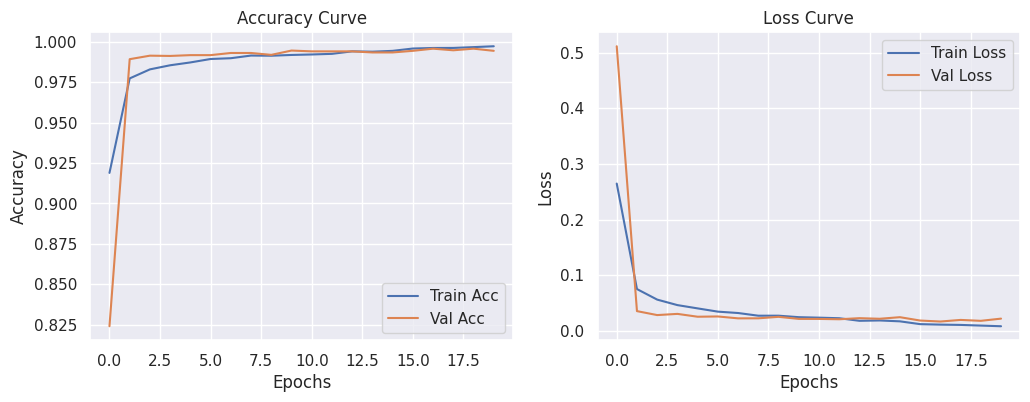

In [61]:
model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.25),

    layers.Conv2D(64, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Add callbacks for early stopping and learning rate reduction
cb = [
    callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
]

history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.1,
    callbacks=cb,
    verbose=2
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Save model
model.save("mnist_cnn_model.h5")

# Reload model
loaded_model = tf.keras.models.load_model("mnist_cnn_model.h5")

# Test prediction on few samples
import numpy as np
predictions = loaded_model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)

print("Predicted labels:", predicted_labels)
print("Actual labels:   ", y_test[:5])


# Recurrent Neural Network (RNN) / LSTM

**Use case:** Sequence modeling (e.g., time series prediction, text, sentiment analysis)  

### Structure:
- **Input layer:** sequence of vectors (e.g., words, sensor readings)  
- **Recurrent layer(s):** maintains memory across time steps  
- **LSTM gates:** control information flow (forget, input, output)  
- **Activation:** typically tanh for cell state, sigmoid for gates  
- **Output layer:** Dense layer for prediction at each step or final step  


### Layer Equations (Basic RNN)
**1. Hidden state update:**
$$
h_t = \sigma_h(W_{xh} x_t + W_{hh} h_{t-1} + b_h)
$$
- $x_t$ = input at time step $t$  
- $h_{t-1}$ = previous hidden state  
- $W_{xh}$ = weights from input to hidden  
- $W_{hh}$ = recurrent weights (hidden to hidden)  
- $b_h$ = bias  
- $\sigma_h$ = activation function (tanh/ReLU)  
- **Intuition:** hidden state carries info from past steps → basic memory  

**2. Output:**
$$
y_t = \sigma_y(W_{hy} h_t + b_y)
$$
- $h_t$ = current hidden state  
- $W_{hy}$ = weights from hidden to output  
- $b_y$ = bias  
- $\sigma_y$ = output activation (sigmoid for binary, softmax for multi-class)  


### LSTM Extension (RNN with Gates)
**Forget gate:** decides what old information to discard
$$
f_t = \sigma(W_f x_t + U_f h_{t-1} + b_f)
$$

**Input gate:** decides what new information to add
$$
i_t = \sigma(W_i x_t + U_i h_{t-1} + b_i)
$$
$$
\tilde{C}_t = \tanh(W_C x_t + U_C h_{t-1} + b_C)
$$

**Cell state update:**
$$
C_t = f_t * C_{t-1} + i_t * \tilde{C}_t
$$

**Output gate:** decides what to output
$$
o_t = \sigma(W_o x_t + U_o h_{t-1} + b_o)
$$
$$
h_t = o_t * \tanh(C_t)
$$`

- **Intuition:**  
  - Forget gate → forget irrelevant memory  
  - Input gate → update memory with new info  
  - Output gate → decide what part of memory to expose  
- This allows **long-term dependencies** to be preserved, unlike basic RNN  


### Loss Functions

**Binary Classification at each time step:**  
$$
L = - \frac{1}{n} \sum_{i=1}^{n} \big[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \big]
$$

**Multi-Class Classification at each time step:**  
$$
L = - \frac{1}{n} \sum_{i=1}^{n} \sum_{c=1}^{C} y_{i,c} \log(\hat{y}_{i,c})
$$`

**Intuition:**  
- Low loss → model predicts probabilities close to true labels  
- High loss → confident wrong predictions are penalized heavily  


### Notes / Assumptions
1. Input sequences padded/truncated to same length.  
2. Input features normalized/scaled if numerical.  
3. Sequence order matters; dependencies exist over time.  
4. Hidden state / cell dimensions chosen to capture temporal patterns without overfitting.  
5. LSTM gates are used for long-term memory; basic RNN only has hidden states.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


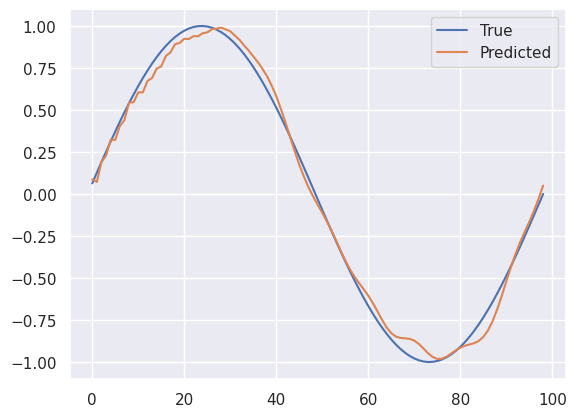

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np

# Toy sequence: predict next number in [0,1] sine wave
t = np.linspace(0,2*np.pi,100)
X = np.sin(t)[:-1].reshape(1,-1,1)   # shape (1, 99, 1)
y = np.sin(t)[1:].reshape(1,-1,1)    # shape (1, 99, 1)

model = Sequential([
    SimpleRNN(10, activation='tanh', return_sequences=True, input_shape=(99,1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=300, verbose=0)

# Prediction
y_pred = model.predict(X)
plt.plot(y.flatten(), label='True')
plt.plot(y_pred.flatten(), label='Predicted')
plt.legend()
plt.show()


In [62]:
from IPython.display import IFrame

IFrame("https://damien0x0023.github.io/rnnExplainer/", width=1300, height=700)

Epoch 1/20
352/352 - 8s - 22ms/step - accuracy: 0.7727 - loss: 0.4634 - val_accuracy: 0.8308 - val_loss: 0.3875
Epoch 2/20
352/352 - 7s - 20ms/step - accuracy: 0.8712 - loss: 0.3057 - val_accuracy: 0.8424 - val_loss: 0.3479
Epoch 3/20
352/352 - 6s - 17ms/step - accuracy: 0.8937 - loss: 0.2643 - val_accuracy: 0.8364 - val_loss: 0.3837
Epoch 4/20
352/352 - 6s - 17ms/step - accuracy: 0.9059 - loss: 0.2334 - val_accuracy: 0.8356 - val_loss: 0.3933
Epoch 5/20
352/352 - 6s - 17ms/step - accuracy: 0.9216 - loss: 0.2014 - val_accuracy: 0.8344 - val_loss: 0.4277
Epoch 6/20
352/352 - 7s - 19ms/step - accuracy: 0.9345 - loss: 0.1722 - val_accuracy: 0.8388 - val_loss: 0.4561
Epoch 7/20
352/352 - 7s - 19ms/step - accuracy: 0.9434 - loss: 0.1519 - val_accuracy: 0.8272 - val_loss: 0.5136
Epoch 8/20
352/352 - 6s - 17ms/step - accuracy: 0.9523 - loss: 0.1299 - val_accuracy: 0.8208 - val_loss: 0.5176
Epoch 9/20
352/352 - 6s - 17ms/step - accuracy: 0.9561 - loss: 0.1196 - val_accuracy: 0.8204 - val_loss:

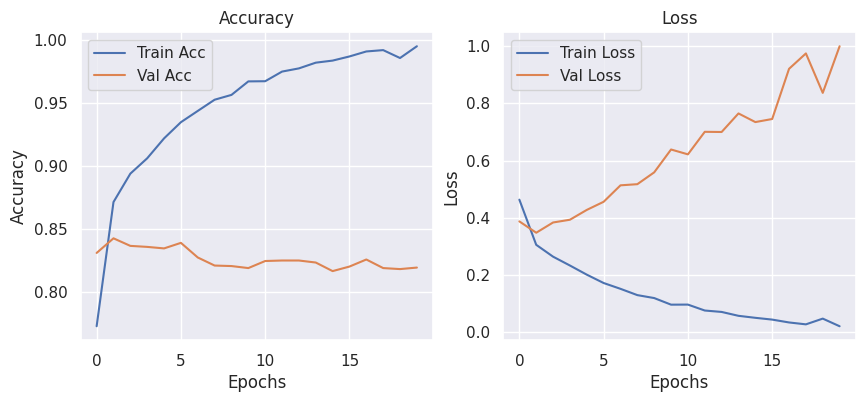

In [64]:
# LSTM Example: Sentiment Analysis on IMDB Dataset
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load IMDB data (top 5000 words)
max_words = 5000
max_len = 100
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Build LSTM model
model = models.Sequential([
    layers.Embedding(input_dim=max_words, output_dim=32, input_length=max_len),
    layers.LSTM(32, return_sequences=False),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.1, verbose=2)

# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {acc:.4f}")

# Plot accuracy and loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend()
plt.show()


# Gated Recurrent Unit (GRU)

**Use case:** Sequence modeling (e.g., time series, text, speech)  

### Structure:
- **Input layer:** sequence of vectors  
- **GRU layer(s):** maintains hidden state with gates  
- **Output layer:** Dense layer for prediction  


### Gates & Equations

**1. Update gate (z_t):** decides how much past information to keep  
$$
z_t = \sigma(W_z x_t + U_z h_{t-1} + b_z)
$$

**2. Reset gate (r_t):** decides how much past information to forget  
$$
r_t = \sigma(W_r x_t + U_r h_{t-1} + b_r)
$$

**3. Candidate activation (\tilde{h}_t):** combines input and past state  
$$
\tilde{h}_t = \tanh(W_h x_t + U_h (r_t \odot h_{t-1}) + b_h)
$$

**4. Final hidden state (h_t):** weighted combination using update gate  
$$
h_t = z_t \odot h_{t-1} + (1 - z_t) \odot \tilde{h}_t
$$

- $x_t$ = input at time $t$  
- $h_{t-1}$ = previous hidden state  
- $\sigma$ = sigmoid activation  
- $\odot$ = element-wise multiplication  


### Output
$$
y_t = \sigma_y(W_{hy} h_t + b_y)
$$
- $\sigma_y$ = activation (sigmoid for binary, softmax for multi-class)


### Loss Functions
- **Binary classification:** Binary Cross-Entropy  
- **Multi-class classification:** Categorical Cross-Entropy  


### Notes / Assumptions
1. Input sequences padded/truncated to same length.  
2. Hidden state dimension chosen to capture temporal patterns.  
3. Input features normalized/scaled if numerical.  
4. Sequences have meaningful temporal dependencies.  


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/stepWARNING:tensorflow:5 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x76c1645018a0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


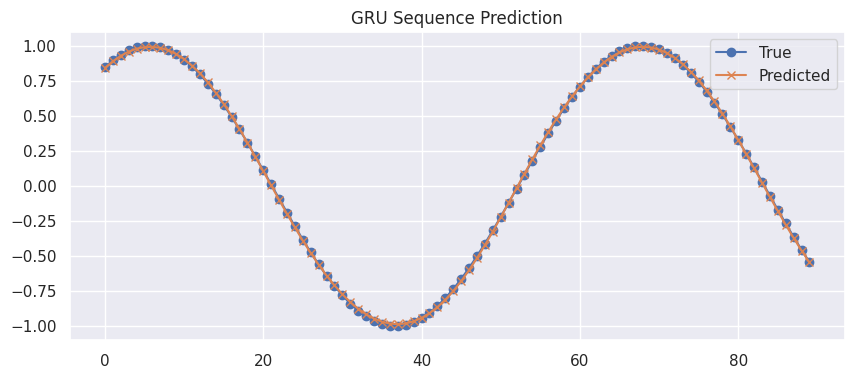

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Generate sine wave
t = np.linspace(0, 10, 100)
data = np.sin(t)

# Prepare sequences
seq_length = 10
X, y = [], []
for i in range(len(data)-seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
X = np.array(X).reshape(-1, seq_length, 1)  # shape: (num_samples, timesteps, features)
y = np.array(y).reshape(-1, 1)             # shape: (num_samples, 1)

# Build GRU model
model = Sequential([
    GRU(16, input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train
model.fit(X, y, epochs=300, verbose=0)

# Predict
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(10,4))
plt.plot(y.flatten(), label='True', marker='o')
plt.plot(y_pred.flatten(), label='Predicted', marker='x')
plt.legend()
plt.title("GRU Sequence Prediction")
plt.show()
